1955 - 2015

All natural disasters and temperature increase - 0.820172793188
LinregressResult(slope=0.001392623009895261, intercept=-0.071620178403980245, rvalue=0.82017279318789815, pvalue=3.3056934472371589e-179, stderr=3.595429573972614e-05)

Wildfire and increase in temperature - 0.82045376391
LinregressResult(slope=0.0034228591427014599, intercept=-0.022837428477786664, rvalue=0.82045376391029856, pvalue=1.9756635684053791e-179, stderr=8.8277792566513608e-05)


Flood and increase in temperature - 0.5307043928968993
LinregressResult(slope=0.022083545783387538, intercept=0.094995412827989234, rvalue=0.5307043928968993, pvalue=9.2360714740984266e-46, stderr=0.0014279733905668941)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import datetime
import math
import scipy

In [3]:
temp_df = pd.read_csv("cleanedGlobalTemp.csv")
disaster_df = pd.read_csv("number-of-natural-disaster-events.csv")
temp_df["dt"] = pd.to_datetime(temp_df["dt"])
temp_df["Year"] = temp_df.dt.dt.year
temp_df.drop(["dt"], axis=1)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,TemperatureChange,Year
0,3.010,0.082,8.385,0.122,-2.220,0.063,13.678,0.052,0.111581,1985
1,2.704,0.085,8.322,0.117,-2.853,0.080,13.731,0.051,-0.093452,1985
2,5.451,0.060,11.194,0.087,-0.133,0.086,14.526,0.050,0.097484,1985
3,8.633,0.085,14.421,0.085,2.905,0.113,15.356,0.054,0.056903,1985
4,11.426,0.066,17.203,0.117,5.756,0.119,16.136,0.050,0.051677,1985
5,13.569,0.187,19.396,0.240,7.908,0.146,16.713,0.070,0.025097,1985
6,13.973,0.087,19.711,0.113,8.362,0.141,16.906,0.051,-0.047839,1985
7,14.059,0.087,19.757,0.113,8.515,0.092,17.013,0.050,0.151032,1985
8,11.980,0.080,17.634,0.138,6.482,0.135,16.357,0.054,0.082484,1985
9,9.338,0.089,14.808,0.048,4.051,0.099,15.476,0.054,0.085742,1985


In [4]:
disaster_df = disaster_df[disaster_df.Year <=2015]
disaster_all_df = disaster_df[disaster_df['Entity']=="All natural disasters"]
disaster_flood_df = disaster_df[disaster_df['Entity']=="Flood"]
disaster_wildfire_df = disaster_df[disaster_df['Entity']=="Wildfire"]
print(disaster_df[disaster_df['Entity']=="Flood"])

    Entity  Code  Year  \
549  Flood   NaN  1900   
550  Flood   NaN  1903   
551  Flood   NaN  1906   
552  Flood   NaN  1909   
553  Flood   NaN  1910   
554  Flood   NaN  1911   
555  Flood   NaN  1915   
556  Flood   NaN  1917   
557  Flood   NaN  1920   
558  Flood   NaN  1925   
559  Flood   NaN  1926   
560  Flood   NaN  1927   
561  Flood   NaN  1928   
562  Flood   NaN  1930   
563  Flood   NaN  1931   
564  Flood   NaN  1933   
565  Flood   NaN  1935   
566  Flood   NaN  1936   
567  Flood   NaN  1937   
568  Flood   NaN  1938   
569  Flood   NaN  1939   
570  Flood   NaN  1940   
571  Flood   NaN  1943   
572  Flood   NaN  1947   
573  Flood   NaN  1948   
574  Flood   NaN  1949   
575  Flood   NaN  1950   
576  Flood   NaN  1951   
577  Flood   NaN  1952   
578  Flood   NaN  1953   
..     ...   ...   ...   
611  Flood   NaN  1986   
612  Flood   NaN  1987   
613  Flood   NaN  1988   
614  Flood   NaN  1989   
615  Flood   NaN  1990   
616  Flood   NaN  1991   
617  Flood  

In [5]:
temp_df = temp_df[temp_df.dt.dt.year>=1950]
temp_new = pd.DataFrame()
for year in range(1950,2016):
    tmp = temp_df[temp_df.Year==year].TemperatureChange.mean()
    temp_new = temp_new.append({'year':year,'TemperatureChange':tmp},ignore_index=True)
    

In [6]:
temp = disaster_all_df.merge(temp_df,on = ["Year"], how='inner', sort=True)
print(temp["Number of disasters (EMDAT (2017)) (reported disasters)"].corr(temp["TemperatureChange"]))
scipy.stats.linregress(temp["Number of disasters (EMDAT (2017)) (reported disasters)"],temp["TemperatureChange"])


0.6613048888017973


LinregressResult(slope=0.0013500600131126814, intercept=-0.07157075872926699, rvalue=0.6613048888017972, pvalue=3.921342488303607e-48, stderr=7.961219800180803e-05)

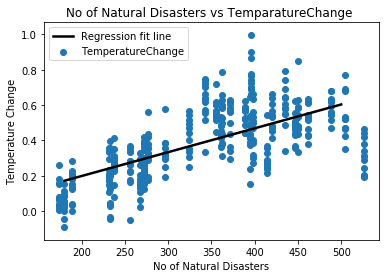

In [7]:
a, b = 0.0013500600131126814, -0.07157075872926699
plt.scatter(temp["Number of disasters (EMDAT (2017)) (reported disasters)"],temp["TemperatureChange"])
f = lambda x: a*x + b
x = np.array([180,500])
plt.title("No of Natural Disasters vs TemparatureChange ")
plt.xlabel('No of Natural Disasters')
plt.ylabel('Temperature Change')
plt.plot(x,f(x),lw=2.5, c="k",label="Regression fit line ")
plt.legend()
plt.show()

In [6]:
temp = disaster_flood_df.merge(temp_df,on = ["Year"], how='inner', sort=True)
print(temp["Number of disasters (EMDAT (2017)) (reported disasters)"].corr(temp["TemperatureChange"]))
scipy.stats.linregress(temp["Number of disasters (EMDAT (2017)) (reported disasters)"],temp["TemperatureChange"])

0.690411811585937


LinregressResult(slope=0.0027472157294053654, intercept=0.05795491943304426, rvalue=0.690411811585937, pvalue=5.634973063973637e-54, stderr=0.0001496484215713633)

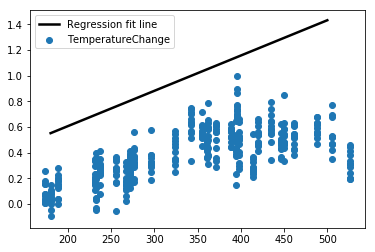

In [12]:
a, b = 0.0027472157294053654, 0.05795491943304426
plt.scatter(temp["Number of disasters (EMDAT (2017)) (reported disasters)"],temp["TemperatureChange"])
f = lambda x: a*x + b
x = np.array([180,500])
plt.plot(x,f(x),lw=2.5, c="k",label="Regression fit line ")
plt.legend()
plt.show()

In [7]:
temp = disaster_wildfire_df.merge(temp_df,on = ["Year"], how='inner', sort=True)
temp["Number of disasters (EMDAT (2017)) (reported disasters)"].corr(temp["TemperatureChange"])
scipy.stats.linregress(temp["Number of disasters (EMDAT (2017)) (reported disasters)"],temp["TemperatureChange"])

LinregressResult(slope=0.004863523698953266, intercept=0.3476859925846402, rvalue=0.15429140437704789, pvalue=0.003336699844144625, stderr=0.0016460229806104453)

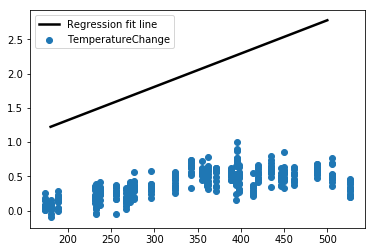

In [13]:
a, b = 0.004863523698953266, 0.3476859925846402
plt.scatter(temp["Number of disasters (EMDAT (2017)) (reported disasters)"],temp["TemperatureChange"])
f = lambda x: a*x + b
x = np.array([180,500])
plt.plot(x,f(x),lw=2.5, c="k",label="Regression fit line ")
plt.legend()
plt.show()